In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
import time

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.4.0
sys.version_info(major=3, minor=8, micro=2, releaselevel='final', serial=0)
matplotlib 3.4.3
numpy 1.19.5
pandas 1.3.4
sklearn 1.0.1
tensorflow 2.4.0
tensorflow.keras 2.4.0


In [8]:
train_dir = "./cifar-10/train"
test_dir = "./cifar-10/test"
valid_dir = './cifar-10/validation'
print(os.path.exists(train_dir))
print(os.path.exists(test_dir))
print(os.path.exists(valid_dir))

print(os.listdir(train_dir))
print(os.listdir(test_dir))
print(os.listdir(valid_dir))

True
True
True
['ship', 'cat', 'bird', 'airplane', 'frog', 'truck', 'horse', 'dog', 'deer', 'automobile']
['ship', 'cat', 'bird', 'airplane', 'frog', 'truck', 'horse', 'dog', 'deer', 'automobile']
['ship', 'cat', 'bird', 'airplane', 'frog', 'truck', 'horse', 'dog', 'deer', 'automobile']


In [9]:
height = 28
width = 28
channels = 3
batch_size = 64
num_classes = 10

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
)
train_generator = train_datagen.flow_from_directory('./cifar-10/train',
                                                   target_size = (height, width),
                                                   batch_size = batch_size,
                                                   seed = 7,
                                                   shuffle = True,
                                                   class_mode = "categorical")
valid_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 7,
                                                    shuffle = False,
                                                    class_mode = "categorical")
train_num = train_generator.samples
valid_num = valid_generator.samples
print(train_num, valid_num)

Found 45000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.
45000 5000


In [10]:
for i in range(2):
    x, y = train_generator.next()
    print(x.shape, y.shape)
    print(y)

(64, 28, 28, 3) (64, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                              padding='same',
                              activation='selu',
                              input_shape=[width, height, channels]))
#这里就是深度可分离卷积
model.add(keras.layers.SeparableConv2D(filters=32, kernel_size=3,
                                       padding='same',
                                       activation='selu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.SeparableConv2D(filters=64, kernel_size=3,
                                       padding='same',
                                       activation='selu'))
model.add(keras.layers.SeparableConv2D(filters=64, kernel_size=3,
                                       padding='same',
                                       activation='selu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.SeparableConv2D(filters=128, kernel_size=3,
                                       padding='same',
                                       activation='selu'))
model.add(keras.layers.SeparableConv2D(filters=128, kernel_size=3,
                                       padding='same',
                                       activation='selu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='selu'))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [12]:
epochs = 20
history = model.fit_generator(train_generator,
                              steps_per_epoch = train_num // batch_size,
                              epochs = epochs,
                              validation_data = valid_generator,
                              validation_steps = valid_num // batch_size)

Epoch 1/20
703/703 [==============================] - 186s 263ms/step - loss: 2.0636 - accuracy: 0.2288 - val_loss: 1.5664 - val_accuracy: 0.4345
Epoch 2/20
703/703 [==============================] - 162s 230ms/step - loss: 1.6748 - accuracy: 0.3974 - val_loss: 1.4854 - val_accuracy: 0.4613
Epoch 3/20
703/703 [==============================] - 163s 232ms/step - loss: 1.5521 - accuracy: 0.4395 - val_loss: 1.3697 - val_accuracy: 0.5156
Epoch 4/20
703/703 [==============================] - 163s 232ms/step - loss: 1.4720 - accuracy: 0.4732 - val_loss: 1.4702 - val_accuracy: 0.4998
Epoch 5/20
703/703 [==============================] - 164s 233ms/step - loss: 1.4266 - accuracy: 0.4900 - val_loss: 1.3677 - val_accuracy: 0.5272
Epoch 6/20
703/703 [==============================] - 166s 237ms/step - loss: 1.3950 - accuracy: 0.5017 - val_loss: 1.3520 - val_accuracy: 0.5359
Epoch 7/20
703/703 [==============================] - 162s 231ms/step - loss: 1.3663 - accuracy: 0.5135 - val_loss: 1.3212 -

In [13]:
model.save('saved_model/my_model_seprable1')

2021-10-30 21:32:25.034200: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_model/my_model_seprable/assets


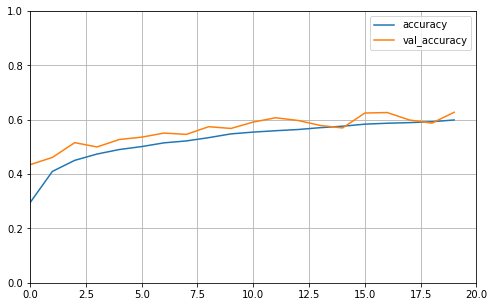

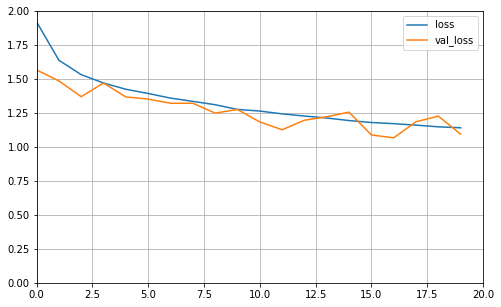

In [14]:
def plot_learning_curves(history, label, epcohs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_'+label]
    pd.DataFrame(data).plot(figsize=(8, 5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()
plot_learning_curves(history, 'accuracy', epochs, 0, 1)
plot_learning_curves(history, 'loss', epochs, 0, 2)

In [17]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (height, width),
    batch_size = batch_size,
    seed = 7,
    shuffle = False,
    class_mode = "categorical")
test_num = test_generator.samples
print(test_num)

Found 10000 images belonging to 10 classes.
10000


In [18]:
test_predict = model.evaluate(test_generator)
print(test_predict)

157/157 [==============================] - 19s 120ms/step - loss: 1.1074 - accuracy: 0.6194
[1.1073724031448364, 0.6194000244140625]


In [19]:
model.save('saved_model1/my_model_seprable')

INFO:tensorflow:Assets written to: saved_model1/my_model_seprable/assets
